In [1]:
"""
This notebook reads GEOSCCM ice model
convective moistening data averaged in 10N-40N.
We plot the convective moistening contributed 
by box regions and latitude bands.
"""

'\nThis notebook reads GEOSCCM ice model\nconvective moistening data averaged in 10N-40N.\nWe plot the convective moistening contributed \nby box regions and latitude bands.\n'

In [2]:
import numpy as np
import pandas as pd
import xarray as xr 
from seasonal_cycle_analysis_functions import *
import matplotlib.pyplot as plt
%matplotlib inline
degree_sign= u'\N{DEGREE SIGN}'
from string import ascii_lowercase
import calendar
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# Read and process data

In [3]:
indir = '/mnt/data/ice2/xwang/ACP2019_data_code/data/'
f = xr.open_dataset(indir+'geosccm_TrajIce-region_convective_moistening.nc')

#--- read convective moistening averaged in 10N-40N
conv_moist_boxr = f.conv_moist_boxr.values  # from box regions
conv_moist_latb = f.conv_moist_latb.values  # from latitude bands
conv_moist = f.conv_moist.values            # total convective moistening in 10N-40N

#--- read convective moistening in teh 10N-40N seasonal cycle amplitude
conv_moist_amp_boxr = f.conv_moist_amp_boxr.values # from box regions
conv_moist_amp_latb = f.conv_moist_amp_latb.values # from latitude bands
conv_moist_amp = f.conv_moist_amp.values           # total in 10N-40N

#--- process the data to plot the contribution from latitude bands
var1 = np.append(conv_moist[np.newaxis,:],conv_moist_latb,axis=0) 
var2 = np.append(conv_moist_amp,conv_moist_amp_latb)
var3 = conv_moist_latb/conv_moist*100              # contribution in percentage
var4 = conv_moist_amp_latb/conv_moist_amp*100      # contribution in percentage

#--- process the data to plot the contribution from box regions
# define latitude and longitude grids to aid plotting on map
lat = np.arange(-90.,95,5); lon = np.arange(0,370,10) 
nlat = np.size(lat); nlon = np.size(lon)
# define the latitude and longitude ranges of the box regions
rlon = np.array([[0,60],[60,120],[120,180],[180,240],[240,300],[300,360]])
rlat = np.array([[10,40],[-10,10],[-40,-10]])

# reshape the data, later put the data into map grids
imon = 8; nrow = np.shape(rlat)[0]; ncol = np.shape(rlon)[0]
max_moist = (conv_moist_boxr[:,imon]).reshape((nrow,ncol))     # convective moistening of seasonal maximum
conv_moist_amp_boxr = conv_moist_amp_boxr.reshape((nrow,ncol)) # convective moistening of seasonal amplitude
max_contrib = max_moist/conv_moist[imon]*100                   # contribution in percentage
amp_contrib = conv_moist_amp_boxr/conv_moist_amp*100           # contribution in percentage
var = np.concatenate((max_moist[np.newaxis,:],conv_moist_amp_boxr[np.newaxis,:],\
                      max_contrib[np.newaxis,:],amp_contrib[np.newaxis,:]),axis=0)
nvar = np.shape(var)[0]
# put the data into map grids
varmap = np.zeros((nvar,nlat,nlon))
for ii in range(nvar):
    for i in range(nrow):
        ilat = np.where(np.logical_and(lat<rlat[i,1],lat>=rlat[i,0]))[0]
        if rlat[i,1]==40:
            ilat = np.where(np.logical_and(lat<=rlat[i,1],lat>=rlat[i,0]))[0]
        for j in range(ncol):
            ilon = np.where(np.logical_and(lon<rlon[j,1],lon>=rlon[j,0]))[0]
            if rlon[j,1]==360:
                ilon = np.where(np.logical_and(lon<=rlon[j,1],lon>=rlon[j,0]))[0]
            varmap[ii,ilat[0]:ilat[-1]+1,ilon[0]:ilon[-1]+1] = var[ii,i,j]*1.

# Begin plotting

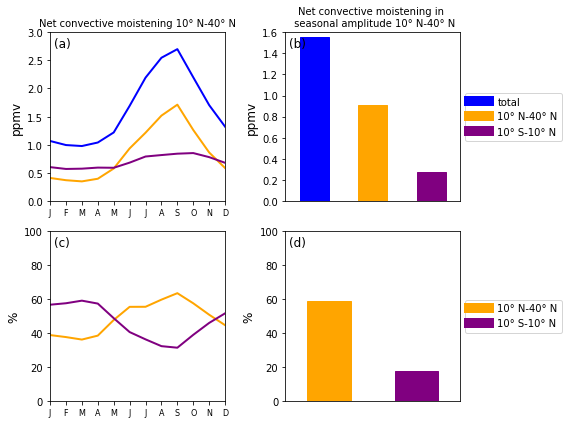

In [4]:
#--- pre-define somr variabels to aid plotting
xt = np.arange(1,13,1)
llabel = llabel = ascii_lowercase[:4] 
xtk = np.array([calendar.month_abbr[i][0] for i in xt]) 
label = ['total', '10'+degree_sign+' N-40'+degree_sign+' N','10'+degree_sign+' S-10'+degree_sign+' N']
color = ['b','orange','purple']
title = ['Net convective moistening 10'+degree_sign+' N-40'+degree_sign+' N',\
        'Net convective moistening in \n seasonal amplitude 10'+\
         degree_sign+' N-40'+degree_sign+' N']

#--- begin plotting
fig,ax = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(8,6,forward=True)

xbar2 = np.arange(1,4,1)
barlist2 = ax[0][1].bar(xbar2,var2,width=0.5)       # plot the convectvie moistening in seasonal amplitude

xbar4 = np.arange(1,3,1)   
barlist4 = ax[1][1].bar(xbar4,var4,width=0.5)       # plot the contribution to seasonal amplitude

for i in range(3):
    ax[0][0].plot(xt,var1[i,:],color=color[i],lw=2) # plot the convective moistening in seaosnal cycle
    ax[0][1].plot(0,0,color=color[i],label=label[i],lw=10) # this is not shown but is used for legend
    barlist2[i].set_color(color[i])                 # This sets the colors of the bars in ax[0][1]
    if i<2:
        ax[1][0].plot(xt,var3[i,:],color=color[i+1],lw=2) # plot the contribution to seaosnal cycle
        ax[1][1].plot(0,0,color=color[i+1],label=label[i+1],lw=10) # this is not shown but is used for legend
        barlist4[i].set_color(color[i+1])           # This sets the colors of the bars in ax[1][1]

#--- setup legends, labels, titles, ticks, etc.
for i in range(2):
    ax[i][0].set_xlim([1,12])
    ax[i][0].set_xticks(xt)
    ax[i][1].set_xticks([])
    ax[i][0].set_xticklabels(xtk,fontsize=8)    
    ax[i][1].legend(bbox_to_anchor=(1,0.5,0.,0.),loc='center left')
    ax[i][0].annotate('('+llabel[i*2]+')',xy=(0.02,0.97),\
                          xycoords='axes fraction',size=12,ha='left',va='top')
    ax[i][1].annotate('('+llabel[i*2+1]+')',xy=(0.02,0.97),\
                          xycoords='axes fraction',size=12,ha='left',va='top')
    ax[0][i].set_ylabel('ppmv',fontsize=12)
    ax[1][i].set_ylabel('%',fontsize=12)
    ax[0][i].set_title(title[i],fontsize=10)

ax[0][1].set_xlim([0.5,3.5])
ax[0][1].set_ylim([0,1.6]) 
ax[0][0].set_ylim([0,3]) 
ax[1][1].set_xlim([0.5,2.5])
ax[1][1].set_ylim([0,100]) 
ax[1][0].set_ylim([0,100]) 

plt.tight_layout(h_pad = 1)



/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


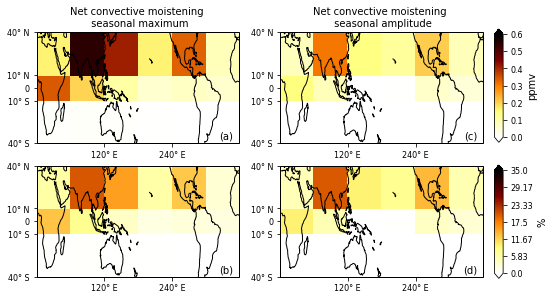

In [5]:
#--- pre-define variables to aid the plotting
x, y= np.meshgrid(lon,lat)
vmin = 0
vmax = [0.6,35]
cby = [0.54,0.12]
lattick = [-40,-10,0,10,40]
lontick = [0,120,240,360]
cblabel = ['ppmv','%']
llabel = ['a','c','b','d']
latstr = ['40'+degree_sign+' S','10'+degree_sign+' S','0',\
          '10'+degree_sign+' N','40'+degree_sign+' N']
lonstr = ['0'+degree_sign+' E','120'+degree_sign+' E','240'+degree_sign+' E','360'+degree_sign+' E']
title = ['Net convective moistening \n seasonal maximum','Net convective moistening \n seasonal amplitude','','']

#--- begin plotting
proj = ccrs.Mercator(central_longitude=180)

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
fig,ax = plt.subplots(nrows=2,ncols=2,subplot_kw={'projection': proj})
fig.set_size_inches(8,4.5,forward=True)

k=0
for i in range(2):
    for j in range(2):
        ax[i][j].set_aspect('auto') 
        ima = ax[i][j].pcolormesh(x,y,varmap[k,:],cmap='afmhot_r',\
                                  vmin=vmin,vmax=vmax[i],transform=ccrs.PlateCarree())         
        
        ax[0][j].set_title(title[j],fontsize=10) 
        ax[i][j].annotate('('+llabel[k]+')',xy=(0.97,0.02),\
                          xycoords='axes fraction',size=10,ha='right',va='bottom')
        ax[i][j].coastlines()
        ax[i][j].xaxis.set_major_formatter(lon_formatter)
        ax[i][j].yaxis.set_major_formatter(lat_formatter)
        ax[i][j].set_yticks(lattick,crs=ccrs.PlateCarree())
        ax[i][j].set_yticklabels(latstr,fontsize=8)
        ax[i][j].set_xticks(lontick,crs=ccrs.PlateCarree())
        ax[i][j].set_xticklabels(lonstr,fontsize=8)
        ax[i][j].set_extent([1,359,-40,40],crs=ccrs.PlateCarree())
        k += 1
    cbaxes = fig.add_axes([0.92,cby[i],0.015,0.35])
    colorbar_setting(fig,ima,ax[i][-1],vmin,vmax[i],7,cblabel[i],cbaxes)

plt.tight_layout(h_pad=0.5,pad=0.5)
